# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14928\2621627868.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

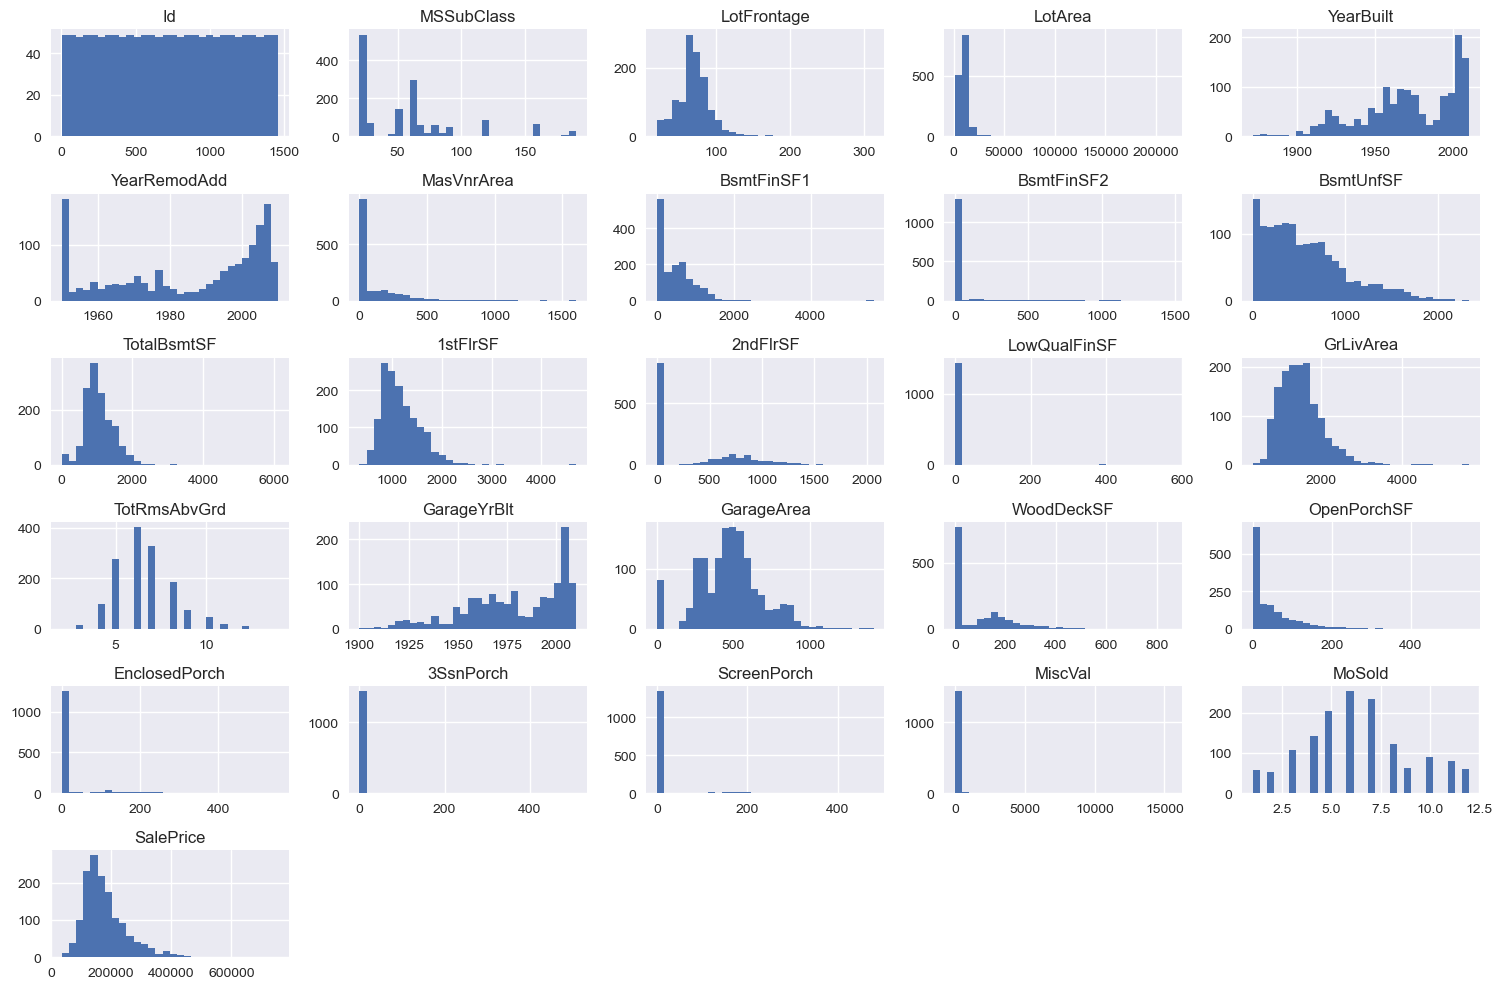

In [3]:
# Your code here
# Filter columns by datatype and unique value count
continuous_vars = ames.select_dtypes(include=['int64', 'float64']).columns
continuous_vars = [col for col in continuous_vars if ames[col].nunique() > 10]  # Adjust the unique value threshold as needed

# Display histograms for continuous variables
ames[continuous_vars].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [4]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = None
# Filter columns by datatype and unique value count
continuous_vars = ames.select_dtypes(include=['int64', 'float64']).columns
continuous_vars = [col for col in continuous_vars if ames[col].nunique() > 10]  # Adjust the unique value threshold as needed

# Identify zero-inflated variables (with a lot of zeros)
zero_inflated_vars = [col for col in continuous_vars if (ames[col] == 0).sum() > len(ames) * 0.95]  # Adjust the threshold as needed

# Select non zero-inflated continuous features
ames_cont = ames.drop(columns=zero_inflated_vars)

# Print selected columns
print(ames_cont.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

## Perform log transformations for the variables where it makes sense

    LotArea  1stFlrSF  GrLivArea
0  9.042040  6.753438   7.444833
1  9.169623  7.141245   7.141245
2  9.328212  6.825460   7.488294
3  9.164401  6.869014   7.448916
4  9.565284  7.044033   7.695758


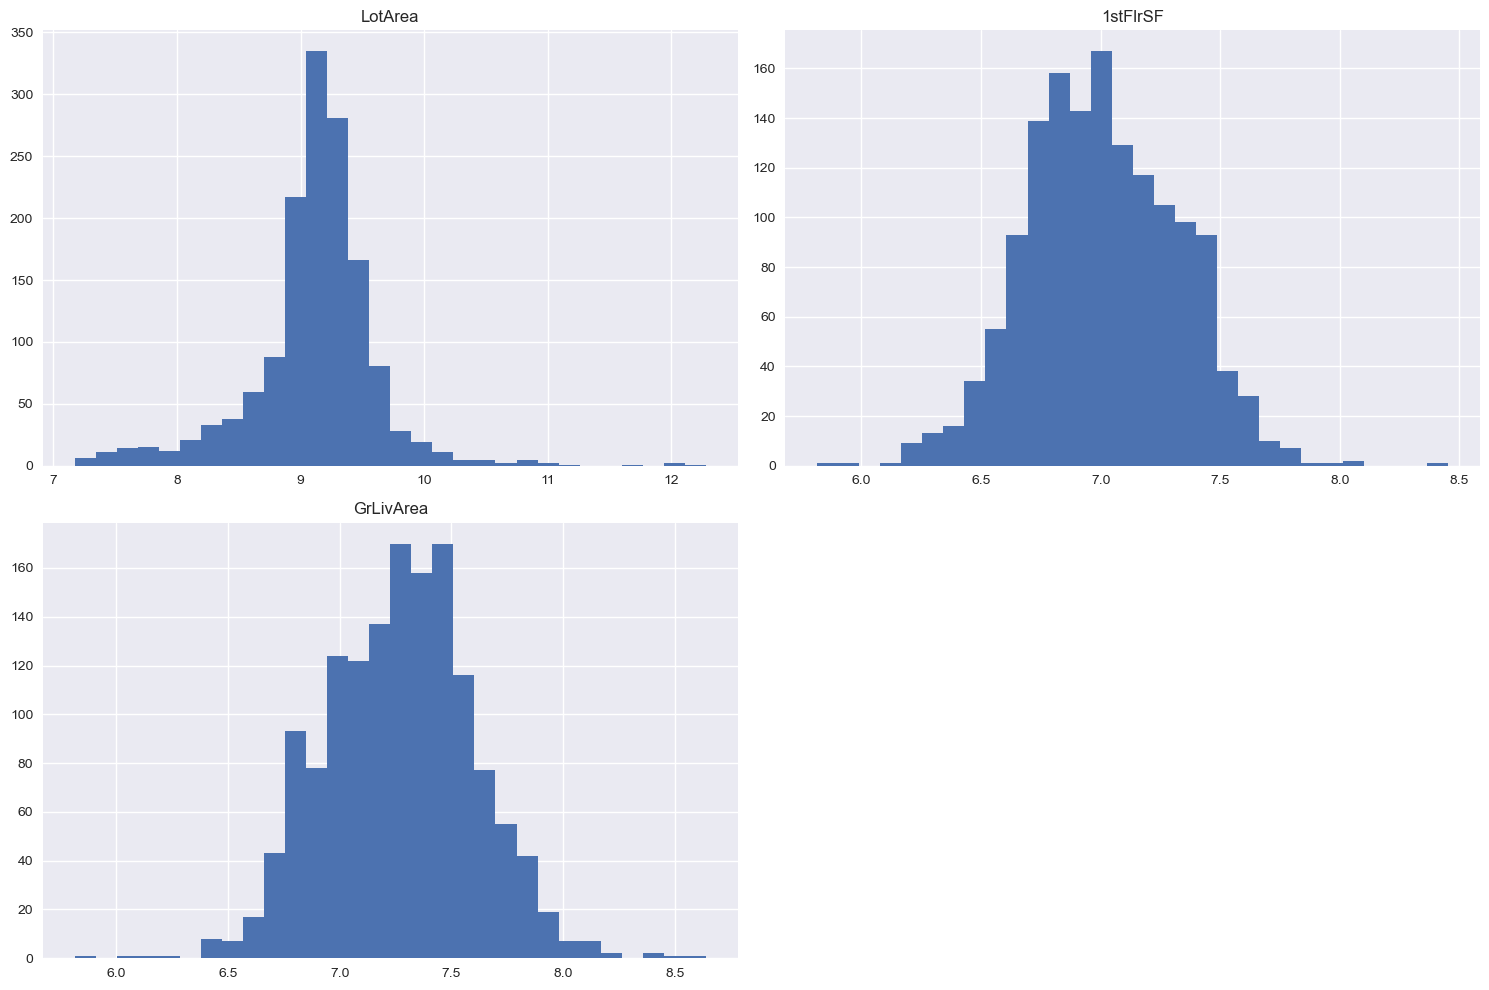

In [6]:
import numpy as np
# Your code here
# Select variables for log transformation (example)
# Here we will perform log transformation on variables that are positively skewed
vars_to_log_transform = ['LotArea', '1stFlrSF', 'GrLivArea']

# Log transformation
ames_log = ames.copy()  # Create a copy of the original DataFrame

for var in vars_to_log_transform:
    ames_log[var] = np.log1p(ames_log[var])  # Apply log transformation using np.log1p to avoid log(0) issues

# Print first few rows to verify transformation
print(ames_log[vars_to_log_transform].head())

# Optionally, you can plot histograms of the transformed variables to visualize the changes
ames_log[vars_to_log_transform].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [7]:
# Your code here
from sklearn.preprocessing import StandardScaler

# Load the data
#ames = pd.read_csv('ames.csv')

# Assuming ames_cont is already filtered to contain non zero-inflated continuous variables
# Replace this assumption with the actual filtering code if not done previously

# Select continuous variables for standardization
continuous_vars = ames.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the data
ames_scaled = ames.copy()  # Create a copy of the original DataFrame
ames_scaled[continuous_vars] = scaler.fit_transform(ames_scaled[continuous_vars])

# Store final features in a DataFrame
features_final = ames_scaled

# Print first few rows of standardized data to verify
print(features_final.head())

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0 -1.730865    0.073375       RL    -0.208034 -0.207142   Pave   NaN      Reg   
1 -1.728492   -0.872563       RL     0.409895 -0.091886   Pave   NaN      Reg   
2 -1.726120    0.073375       RL    -0.084449  0.073480   Pave   NaN      IR1   
3 -1.723747    0.309859       RL    -0.414011 -0.096897   Pave   NaN      IR1   
4 -1.721374    0.073375       RL     0.574676  0.375148   Pave   NaN      IR1   

  LandContour Utilities  ...  PoolArea PoolQC Fence MiscFeature   MiscVal  \
0         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
1         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
2         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
3         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
4         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   

     MoSold    YrSold  SaleType  SaleCondition  Sa

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!